# Visualizing the secondary amine dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

/Users/isaiahbetinol/opt/anaconda3/envs/amine_generality/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../results/iminium_VS_xgb.csv')
reduced_df = df[df['Secondary Amine'] == 'amine 2']

cluster_pipe = Pipeline([('vt',VarianceThreshold()), ('scaler',StandardScaler()), ('umap',umap.UMAP(random_state=25,
    min_dist=1,  # Default is 0.1
    n_neighbors=len(reduced_df)-1,  # Default is 15
    n_components=2))])

X = reduced_df.iloc[:,5:21]

embedding = cluster_pipe.fit_transform(X)

/Users/isaiahbetinol/opt/anaconda3/envs/amine_generality/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
df2 = pd.read_excel('../data/dataset.xlsx',sheet_name='iminium')


training_rxn = df2['Reaction Component Engages in Enamine and Iminium Formation']+'_'+df2['Reactant']
virtual_rxn = reduced_df['Reaction Component Engages in Enamine and Iminium Formation']+'_'+reduced_df['Reactant']

In [4]:
indexes = [np.where(virtual_rxn == rxn)[0][0] for rxn in virtual_rxn if np.isin(rxn, training_rxn)]

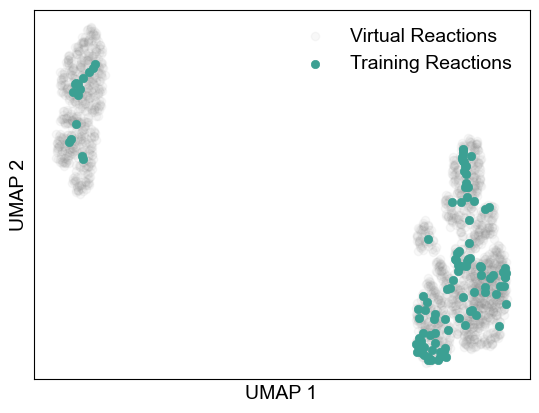

In [5]:
plt.scatter(embedding[:,0], embedding[:,1], alpha=0.05, color='grey', label='Virtual Reactions')
plt.scatter(embedding[indexes,0], embedding[indexes,1], alpha=1, color='#3ca093', edgecolors='#3ca093', 
            linewidths=0.5, label='Training Reactions')
plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(frameon=False)
plt.show()
